In [1]:
# Apply appropriate ML algorithm on a dataset collected in a cosmetics shop showing details of 
# customers to predict customer response for special offer.  
# Create confusion matrix based on above data and find 
# a) Accuracy 
# b) Precision 
# c) Recall 
# d) F-1 score

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [9]:
dataset = pd.read_csv("Customers.csv")

In [10]:
dataset.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [11]:
dataset = dataset.drop(columns=['CustomerID'])

In [12]:
dataset.head()

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,Male,19,15000,39,Healthcare,1,4
1,Male,21,35000,81,Engineer,3,3
2,Female,20,86000,6,Engineer,1,1
3,Female,23,59000,77,Lawyer,0,2
4,Female,31,38000,40,Entertainment,2,6


In [ ]:
# Encode categorical variable 'Gender' and 'Profession'
le = LabelEncoder()
dataset['Gender'] = le.fit_transform(dataset['Gender'])
dataset['Profession'] = le.fit_transform(dataset['Profession'])

In [15]:
# Define features and target variable
X = dataset[['Gender', 'Age', 'Annual Income ($)', 'Work Experience', 'Family Size', 'Profession']]
dataset['Spending_Category'] = dataset['Spending Score (1-100)'].apply(lambda x: 1 if x > 50 else 0)  # High (1) vs Low (0)
y = dataset['Spending_Category']

In [16]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Train Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [18]:
# Predictions
y_pred = model.predict(X_test)

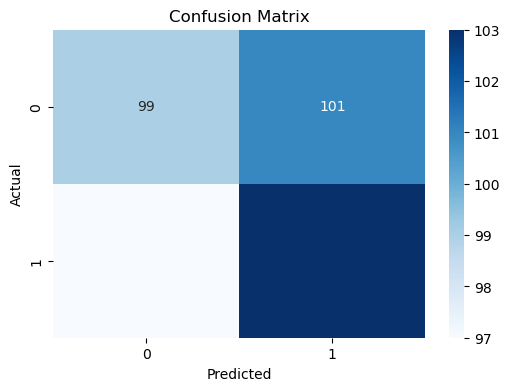

In [19]:
# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [22]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [23]:
print(f"Accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"Recall:{recall}")
print(f"f1: {f1}")

Accuracy: 0.505
precision: 0.5049019607843137
Recall:0.515
f1: 0.5099009900990098
